In [54]:
# Imports
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

### ATP Match Data 

In [55]:
# Load ATP match data
# Ideally we would want to use pl.scan_csv() for faster processing and perform operations beforehand
df_atp_matches = pl.read_csv("../data/raw/atp_matches_raw.csv")

# Display some rows
df_atp_matches.head()

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,Year
str,str,str,i64,str,i64,i64,i64,i64,str,str,str,i64,str,f64,i64,i64,str,str,str,i64,str,f64,str,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2014-339""","""Brisbane""","""Hard""",28,"""A""",20131229,1,103813,null,null,"""Jarkko Nieminen""","""L""",185,"""FIN""",32.4,105902,null,"""WC""","""James Duckworth""","""R""",183,"""AUS""",21.9,"""6-2 6-3""",3,"""R32""",72,5,3,71,54,36,9,9,5,5,9,7,51,29,23,6,8,2,5,39,1090,136,425,2014
"""2014-339""","""Brisbane""","""Hard""",28,"""A""",20131229,2,104594,null,null,"""Marinko Matosevic""","""R""",194,"""AUS""",28.3,103898,null,null,"""Julien Benneteau""","""R""",185,"""FRA""",32.0,"""5-7 6-4 7-6(4)""",3,"""R32""",161,11,3,112,68,43,26,17,5,9,14,1,117,76,51,18,17,7,11,61,774,35,1160,2014
"""2014-339""","""Brisbane""","""Hard""",28,"""A""",20131229,3,105023,null,null,"""Sam Querrey""","""R""",198,"""USA""",26.2,104098,7,null,"""Dmitry Tursunov""","""R""",185,"""RUS""",31.0,"""7-5 6-4""",3,"""R32""",77,18,1,58,40,36,7,11,2,3,4,0,63,40,26,12,11,6,9,46,960,29,1244,2014
"""2014-339""","""Brisbane""","""Hard""",28,"""A""",20131229,4,105032,null,"""WC""","""Sam Groth""","""R""",193,"""AUS""",26.1,105992,null,"""Q""","""Ryan Harrison""","""R""",185,"""USA""",21.6,"""7-6(3) 7-6(2)""",3,"""R32""",95,23,2,70,51,46,10,12,1,1,5,4,86,59,43,15,12,4,4,172,307,100,549,2014
"""2014-339""","""Brisbane""","""Hard""",28,"""A""",20131229,5,103917,null,null,"""Nicolas Mahut""","""R""",191,"""FRA""",31.9,104997,null,null,"""Igor Sijsling""","""R""",191,"""NED""",26.3,"""3-6 6-4 6-4""",3,"""R32""",107,15,4,100,59,46,18,15,4,6,13,2,78,50,43,12,14,2,4,50,918,70,697,2014


In [56]:
# Display basic dataframe information
print("Number of rows:", df_atp_matches.shape[0])
print("Number of columns:", df_atp_matches.shape[1])

print("\nColumn types:")
for column_name, data_type in df_atp_matches.schema.items():
    print(f"  Column: {column_name:<25} Type: {data_type}")

Number of rows: 30573
Number of columns: 50

Column types:
  Column: tourney_id                Type: String
  Column: tourney_name              Type: String
  Column: surface                   Type: String
  Column: draw_size                 Type: Int64
  Column: tourney_level             Type: String
  Column: tourney_date              Type: Int64
  Column: match_num                 Type: Int64
  Column: winner_id                 Type: Int64
  Column: winner_seed               Type: Int64
  Column: winner_entry              Type: String
  Column: winner_name               Type: String
  Column: winner_hand               Type: String
  Column: winner_ht                 Type: Int64
  Column: winner_ioc                Type: String
  Column: winner_age                Type: Float64
  Column: loser_id                  Type: Int64
  Column: loser_seed                Type: Int64
  Column: loser_entry               Type: String
  Column: loser_name                Type: String
  Column: loser_h

In [57]:
# Missing values
df_atp_matches.null_count()

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,Year
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,53,0,0,0,0,0,17582,26269,0,0,227,0,3,0,23086,23803,0,4,580,0,3,0,0,0,3051,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,167,167,407,407,0


### Basic Visualizations 
Generate some visualizations to see some of the data before preprocessing.

Text(0.5, 1.0, 'Correlation Heatmap')

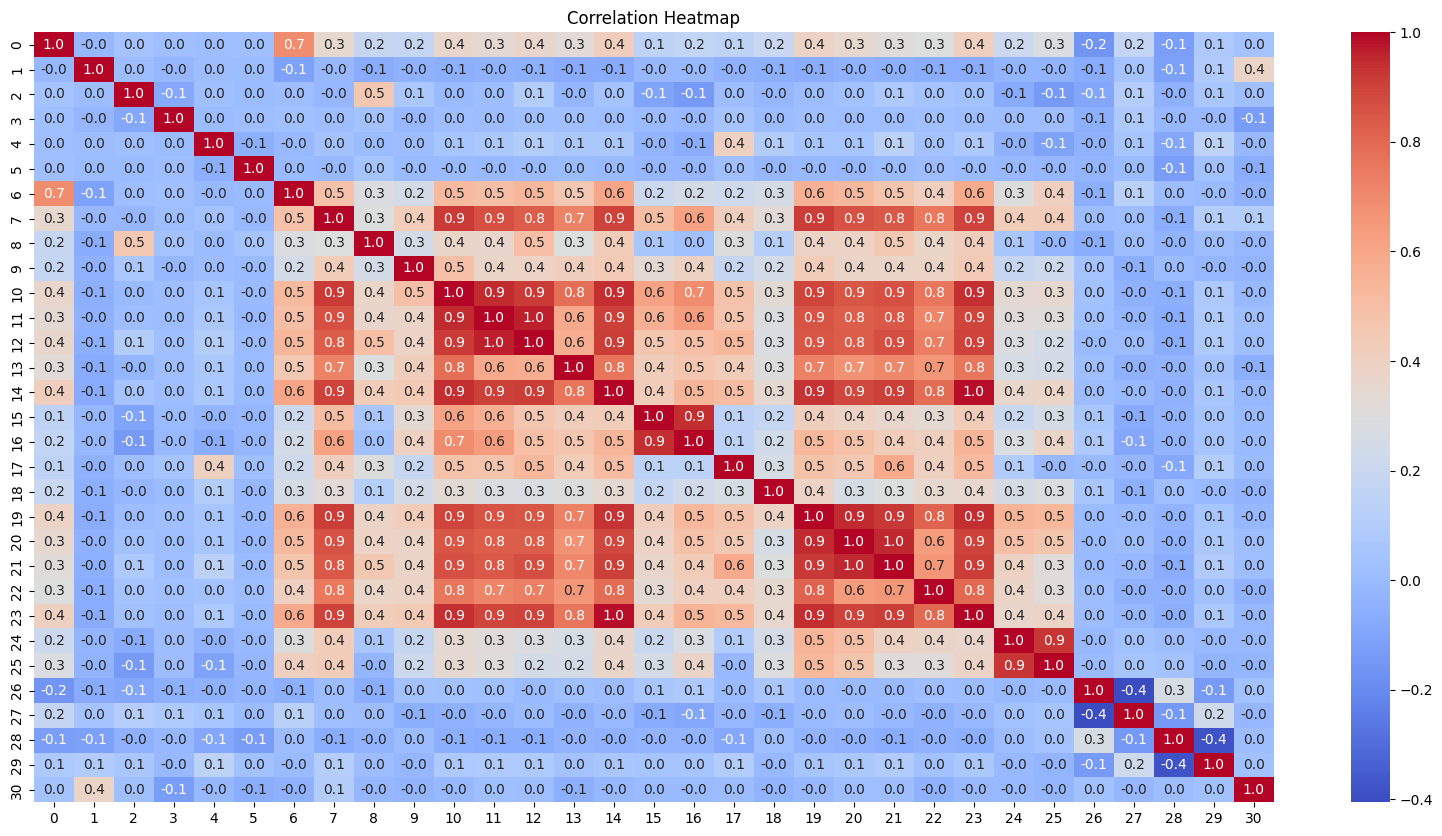

In [ ]:
# Filter out any columns with strings or nulls so corr() works properly
# Exclude columns that are known to not provide any useful insights 
df_corr_atp = df_atp_matches.select(
    pl.exclude(pl.String)
    .exclude("tourney_date")  
    .exclude("winner_seed")
    .exclude("winner_id")
    .exclude("match__num")
    .exclude("loser_seed")
    .exclude("loser_id")
).drop_nulls()

# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr_atp.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Distribution of Surface Types')

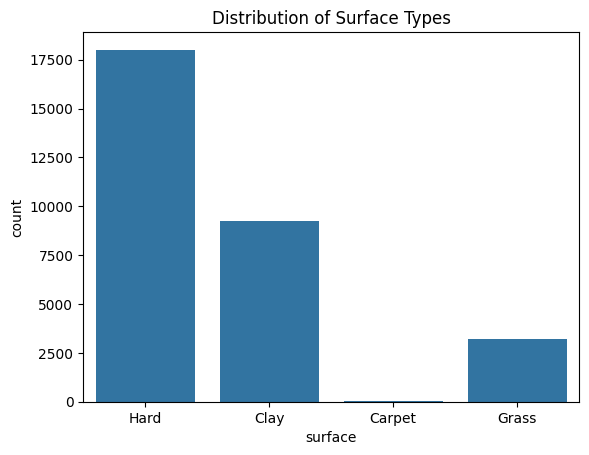

In [62]:
# Surface distribution
sns.countplot(x='surface', data=df_atp_matches)
plt.title('Distribution of Surface Types')

Text(0.5, 1.0, 'Distribution of Winner Age')

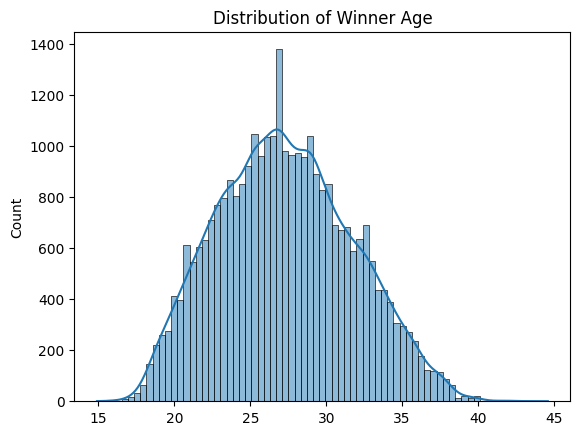

In [92]:
# Distribution of winner's age
sns.histplot(df_atp_matches['winner_age'], kde=True)
plt.title('Distribution of Winner Age')

Text(0.5, 1.0, 'Aces by Winner vs Loser')

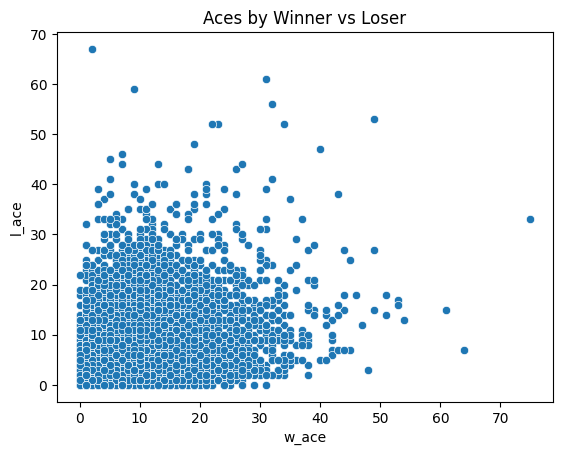

In [65]:
# Number of aces from winner vs loser
sns.scatterplot(x='w_ace', y='l_ace', data=df_atp_matches)
plt.title('Aces by Winner vs Loser')

### Betting Odds

In [59]:
# Load ATP match data
df_betting_odds = pl.read_csv("../data/raw/betting_odds_raw.csv")

# Display some rows
df_betting_odds.head()

ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,EXW,EXL,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,Year
i64,str,str,str,str,str,str,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,i64,i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
1,"""Brisbane""","""Brisbane International""","""2013-12-30""","""ATP250""","""Outdoor""","""Hard""","""1st Round""",3,"""Matosevic M.""","""Benneteau J.""",61,35,774,1160,5,7,6,4,7,6,null,null,null,null,2,1,"""Completed""",1.72,2.0,1.8,2.0,1.91,1.8,1.88,2.01,1.91,1.8,2.0,2.1,1.82,1.94,2014
1,"""Brisbane""","""Brisbane International""","""2013-12-30""","""ATP250""","""Outdoor""","""Hard""","""1st Round""",3,"""Nieminen J.""","""Duckworth J.""",39,136,1090,425,6,2,6,3,null,null,null,null,null,null,2,0,"""Completed""",1.28,3.5,1.33,3.2,1.33,3.25,1.35,3.47,1.36,2.88,1.36,3.8,1.32,3.32,2014
1,"""Brisbane""","""Brisbane International""","""2013-12-30""","""ATP250""","""Outdoor""","""Hard""","""1st Round""",3,"""Cilic M.""","""Istomin D.""",37,45,1130,965,6,7,7,6,6,4,null,null,null,null,2,1,"""Completed""",1.36,3.0,1.4,2.9,1.44,2.62,1.39,3.22,1.4,2.75,1.44,3.55,1.39,2.93,2014
1,"""Brisbane""","""Brisbane International""","""2013-12-30""","""ATP250""","""Outdoor""","""Hard""","""1st Round""",3,"""Querrey S.""","""Tursunov D.""",46,29,960,1244,7,5,6,4,null,null,null,null,null,null,2,0,"""Completed""",1.9,1.8,1.9,1.85,1.91,1.8,1.99,1.9,1.91,1.8,2.1,1.91,1.92,1.83,2014
1,"""Brisbane""","""Brisbane International""","""2013-12-30""","""ATP250""","""Outdoor""","""Hard""","""1st Round""",3,"""Dimitrov G.""","""Haase R.""",23,43,1520,977,6,2,6,3,null,null,null,null,null,null,2,0,"""Completed""",1.25,3.75,1.3,3.4,1.33,3.25,1.28,4.01,1.29,3.25,1.33,4.33,1.29,3.53,2014


In [88]:
# Display basic dataframe information
print("Number of rows:", df_betting_odds.shape[0])
print("Number of columns:", df_betting_odds.shape[1])

print("\nColumn types:")
for column_name, data_type in df_betting_odds.schema.items():
    print(f"  Column: {column_name:<25} Type: {data_type}")

Number of rows: 27530
Number of columns: 43

Column types:
  Column: ATP                       Type: Int64
  Column: Location                  Type: String
  Column: Tournament                Type: String
  Column: Date                      Type: String
  Column: Series                    Type: String
  Column: Court                     Type: String
  Column: Surface                   Type: String
  Column: Round                     Type: String
  Column: Best of                   Type: Int64
  Column: Winner                    Type: String
  Column: Loser                     Type: String
  Column: WRank                     Type: Int64
  Column: LRank                     Type: Int64
  Column: WPts                      Type: Int64
  Column: LPts                      Type: Int64
  Column: W1                        Type: Int64
  Column: L1                        Type: Int64
  Column: W2                        Type: Int64
  Column: L2                        Type: Int64
  Column: W3        

In [89]:
# Missing values
df_betting_odds.null_count()

ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,EXW,EXL,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,Year
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,15,0,0,11,57,10,57,185,182,400,400,14268,14268,24753,24753,26497,26497,185,188,0,103,99,14466,14461,15197,15194,128,128,25032,25032,25,25,25,25,0


### Basic Visualizations 
Generate some visualizations to see some of the data before preprocessing.

Text(0, 0.5, 'Frequency')

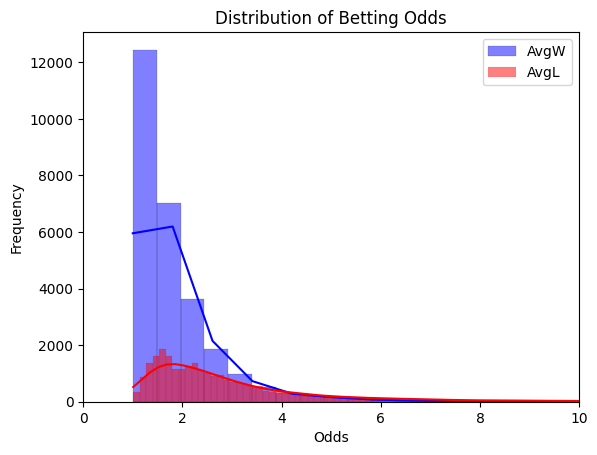

In [113]:
sns.histplot(df_betting_odds['AvgW'], kde=True, color='blue', label='AvgW')
sns.histplot(df_betting_odds['AvgL'], kde=True, color='red', label='AvgL')
plt.xlim(0,10)
plt.legend()
plt.title('Distribution of Betting Odds')
plt.xlabel('Odds')
plt.ylabel('Frequency')

c:\Users\Admin\Projects\tennis-match-predictor\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Admin\Projects\tennis-match-predictor\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Correlation Heatmap')

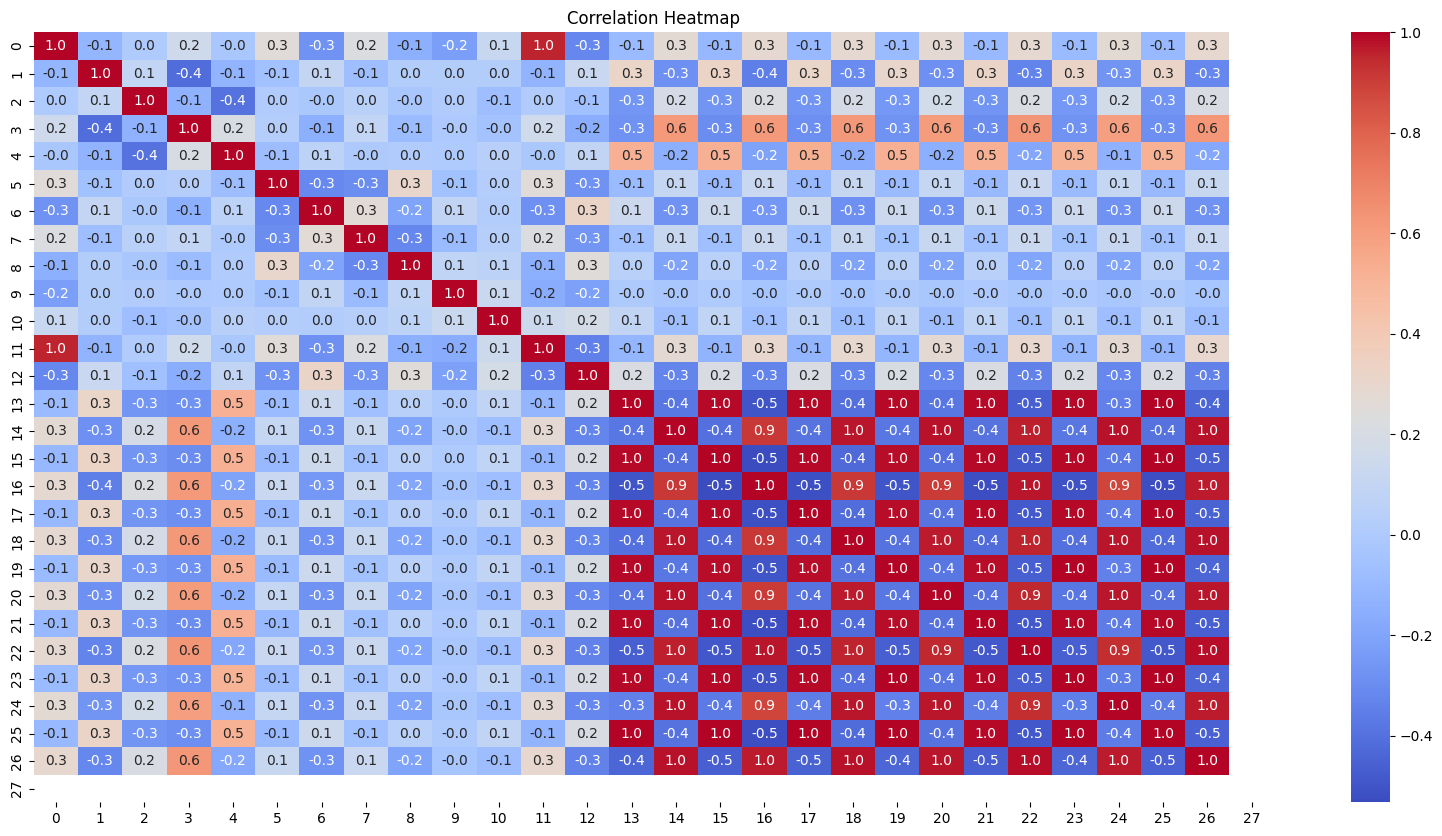

In [118]:
# Filter out any columns with strings or nulls so corr() works properly
# Exclude columns that are known to not provide any useful insights 
df_corr_betting = df_betting_odds.select(
    pl.exclude(pl.String)
    .exclude("ATP")  
).drop_nulls()

# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr_betting.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')